# Ingeniería Industrial con Python: Arreglos Multidimensionales (Paso a Paso)

**Objetivo del cuaderno:** aplicar arreglos multidimensionales (NumPy) a problemas clásicos de Ingeniería Industrial:  
control de producción, inventarios, balance de línea, control de calidad, costos/proveedores y relación velocidad–defectos.

> Requisitos: Python 3.x, NumPy, Matplotlib (incluidos en la mayoría de entornos científicos).


In [1]:
# Importaciones básicas
import numpy as np
import matplotlib.pyplot as plt

# Asegurar reproducibilidad en datos aleatorios (si se usan)
np.set_printoptions(precision=2, suppress=True)

## 1) Control de Producción por Línea y Turno

**Planteamiento:** Una planta opera con **3 líneas** y **4 turnos**. La matriz \(P\) (3×4) contiene unidades producidas.  
**Meta:** calcular producción total por **línea** (filas), por **turno** (columnas) y **total diario**; visualizar resultados.

**Interpretación:** permite comparar rendimientos para decisiones de capacidad y asignación de personal.


In [2]:
# Matriz producción: filas = líneas, columnas = turnos
P = np.array([
    [120, 135, 150, 160],
    [100, 115, 120, 130],
    [ 90, 110, 115, 125]
])

print("Matriz de producción (Líneas x Turnos):\n", P)

# Totales
total_linea = P.sum(axis=1)
total_turno = P.sum(axis=0)
total_diario = P.sum()

print("\nProducción total por línea:", total_linea)
print("Producción total por turno:", total_turno)
print("Producción total diaria:", total_diario)

Matriz de producción (Líneas x Turnos):
 [[120 135 150 160]
 [100 115 120 130]
 [ 90 110 115 125]]

Producción total por línea: [565 465 440]
Producción total por turno: [310 360 385 415]
Producción total diaria: 1470


### Visualización rápida

> Se grafican barras para (a) producción por línea y (b) producción por turno.  
Regla del cuaderno: una figura por gráfico y sin estilos ni colores manuales.


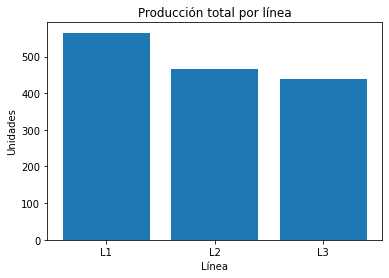

In [3]:
# (a) Barras: total por línea
plt.figure()
plt.bar([1,2,3], total_linea)
plt.title("Producción total por línea")
plt.xlabel("Línea")
plt.ylabel("Unidades")
plt.xticks([1,2,3], ["L1","L2","L3"])
plt.show()

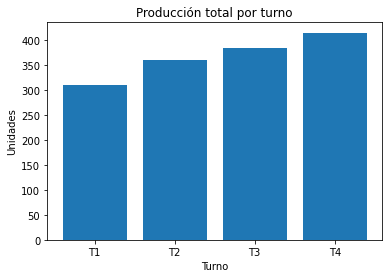

In [4]:
# (b) Barras: total por turno
plt.figure()
plt.bar([1,2,3,4], total_turno)
plt.title("Producción total por turno")
plt.xlabel("Turno")
plt.ylabel("Unidades")
plt.xticks([1,2,3,4], ["T1","T2","T3","T4"])
plt.show()

## 2) Control de Inventario en Almacenes

**Planteamiento:** Tres **productos** en **tres almacenes**. Matriz \(I\) (3×3) con unidades disponibles.  
**Meta:** total por producto y por almacén; detectar bajo **stock** (< 400).

**Interpretación:** ayuda a priorizar reposiciones y prevenir quiebres de inventario.


In [5]:
# Matriz inventario: filas = productos, columnas = almacenes
I = np.array([
    [500, 450, 480],  # Producto A
    [300, 320, 290],  # Producto B
    [700, 750, 730]   # Producto C
])

total_producto = I.sum(axis=1)
total_almacen  = I.sum(axis=0)
bajo_stock = I < 400

print("Inventario (Prod x Almacén):\n", I)
print("\nTotal por producto:", total_producto)
print("Total por almacén:", total_almacen)
print("\nBajo stock (<400) [True=alerta]:\n", bajo_stock)

Inventario (Prod x Almacén):
 [[500 450 480]
 [300 320 290]
 [700 750 730]]

Total por producto: [1430  910 2180]
Total por almacén: [1500 1520 1500]

Bajo stock (<400) [True=alerta]:
 [[False False False]
 [ True  True  True]
 [False False False]]


## 3) Balance de Línea de Producción (Tiempos por Estación)

**Planteamiento:** Se procesan **3 productos** en **4 estaciones**. Matriz \(T\) (3×4) con tiempos (s).  
**Meta:** promedio por estación, promedio por producto, y **cuello de botella** (máximo promedio por estación).

**Interpretación:** la estación cuello de botella limita la capacidad del sistema.


In [6]:
# Matriz tiempos: filas = productos, columnas = estaciones
T = np.array([
    [30, 35, 32, 31],   # Producto 1
    [40, 38, 42, 45],   # Producto 2
    [28, 30, 31, 29]    # Producto 3
])

prom_estacion = T.mean(axis=0)
prom_producto = T.mean(axis=1)

idx_max = np.argmax(prom_estacion)  # índice de estación con mayor promedio
print("Tiempos (Prod x Estación):\n", T)
print("\nPromedio por estación:", prom_estacion)
print("Promedio por producto:", prom_producto)
print(f"\nCuello de botella: estación {idx_max+1} ({prom_estacion[idx_max]} s)")

Tiempos (Prod x Estación):
 [[30 35 32 31]
 [40 38 42 45]
 [28 30 31 29]]

Promedio por estación: [32.67 34.33 35.   35.  ]
Promedio por producto: [32.   41.25 29.5 ]

Cuello de botella: estación 3 (35.0 s)


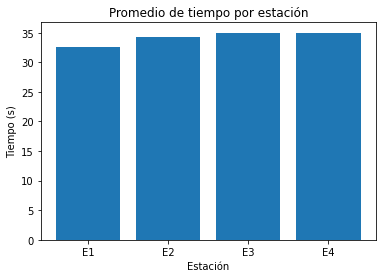

In [7]:
# Visualizar promedios por estación
plt.figure()
plt.bar([1,2,3,4], prom_estacion)
plt.title("Promedio de tiempo por estación")
plt.xlabel("Estación")
plt.ylabel("Tiempo (s)")
plt.xticks([1,2,3,4], ["E1","E2","E3","E4"])
plt.show()

## 4) Control de Calidad por Lotes (Mediciones de Diámetro)

**Planteamiento:** Se inspeccionan **5 lotes** con **4 mediciones** de diámetro (mm) por lote. Matriz \(Q\) (5×4).  
**Meta:** promedio y desviación estándar por lote; marcar fuera de tolerancia **50 ± 0.3 mm**.

**Interpretación:** permite implementar prácticas de **SPC** y detectar desviaciones anormales.


In [8]:
Q = np.array([
    [49.8, 50.1, 50.3, 49.9],
    [50.0, 49.7, 49.8, 50.2],
    [49.9, 50.1, 50.0, 50.1],
    [50.3, 50.5, 50.4, 50.2],
    [49.6, 49.9, 50.0, 49.8]
])

prom_lote = Q.mean(axis=1)
desv_lote  = Q.std(axis=1)

fuera_tol = (prom_lote < 49.7) | (prom_lote > 50.3)

print("Mediciones (Lote x Muestras):\n", Q)
print("\nPromedio por lote:", prom_lote)
print("Desviación estándar por lote:", desv_lote)
print("Fuera de tolerancia (50 ± 0.3):", fuera_tol)

Mediciones (Lote x Muestras):
 [[49.8 50.1 50.3 49.9]
 [50.  49.7 49.8 50.2]
 [49.9 50.1 50.  50.1]
 [50.3 50.5 50.4 50.2]
 [49.6 49.9 50.  49.8]]

Promedio por lote: [50.02 49.92 50.02 50.35 49.83]
Desviación estándar por lote: [0.19 0.19 0.08 0.11 0.15]
Fuera de tolerancia (50 ± 0.3): [False False False  True False]


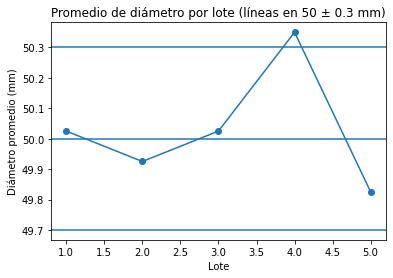

In [9]:
# Gráfico: promedio por lote y línea de objetivo (50 mm)
plt.figure()
plt.plot(range(1, len(prom_lote)+1), prom_lote, marker='o')
plt.axhline(50.0)
plt.axhline(50.3)
plt.axhline(49.7)
plt.title("Promedio de diámetro por lote (líneas en 50 ± 0.3 mm)")
plt.xlabel("Lote")
plt.ylabel("Diámetro promedio (mm)")
plt.show()

## 5) Costos de Materiales por Proveedor

**Planteamiento:** Tres productos y tres proveedores. Matriz \(C\) (3×3) con costos unitarios ($).  
**Meta:** costo mínimo por producto y proveedor asociado.

**Interpretación:** apoyo a decisiones de compras y análisis ABC.


In [10]:
C = np.array([
    [12.5, 13.0, 12.8],  # Producto A
    [ 9.8, 10.2, 10.1],  # Producto B
    [15.2, 14.9, 15.0]   # Producto C
])

min_cost = C.min(axis=1)
best_sup = C.argmin(axis=1)

for i, (c, idx) in enumerate(zip(min_cost, best_sup)):
    print(f"Producto {i+1}: mejor proveedor #{idx+1} con costo ${c}")

Producto 1: mejor proveedor #1 con costo $12.5
Producto 2: mejor proveedor #1 con costo $9.8
Producto 3: mejor proveedor #2 con costo $14.9


## 6) Correlación entre Velocidad de Producción y Defectos

**Planteamiento:** Se registran pares (velocidad, defectos) por día. Matriz \(D\) (n×2).  
**Meta:** calcular el **coeficiente de correlación de Pearson** y visualizar la nube de puntos.

**Interpretación:** si la correlación es alta y positiva, incrementar velocidad podría elevar defectos; balancear productividad-calidad.


In [11]:
D = np.array([
    [100, 3],
    [120, 5],
    [140, 6],
    [160, 8],
    [180,10]
])

vel = D[:,0]
defectos = D[:,1]
r = np.corrcoef(vel, defectos)[0,1]

print("Datos velocidad–defectos:\n", D)
print("Coeficiente de correlación (Pearson):", round(r, 3))

Datos velocidad–defectos:
 [[100   3]
 [120   5]
 [140   6]
 [160   8]
 [180  10]]
Coeficiente de correlación (Pearson): 0.995


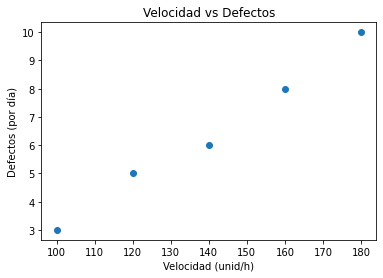

In [12]:
# Dispersión velocidad vs defectos
plt.figure()
plt.scatter(vel, defectos)
plt.title("Velocidad vs Defectos")
plt.xlabel("Velocidad (unid/h)")
plt.ylabel("Defectos (por día)")
plt.show()

---

## Conclusión
Este cuaderno mostró cómo **arreglos multidimensionales** permiten modelar datos industriales y aplicar cálculos clave para:
- **Producción** (totales por línea/turno),
- **Inventarios** (bajo stock),
- **Balance de línea** (cuellos de botella),
- **Calidad** (tolerancias),
- **Costos** (selección de proveedor),
- **Análisis estadístico** (correlaciones).

> Extensiones sugeridas: indicadores OEE, simulación de escenarios de capacidad, series de tiempo de inventario, y control estadístico de procesos (gráficas X̄-R).
